In [2]:
import re
import tweepy
from tweepy import OAuthHandler
import sys
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
consumer_key = 'RwaBDcLF27BCa0c3gHJlEKmS6'
consumer_secret = 'MEzgzQdO2JstpIVgHfAWHYbsbwKmWXrYBNHc0kHUiJmVH5ltOL'
access_token = '1007280185018761217-FV0lAB67v18NLGIrCUfimOoR1K88uP'
access_token_secret = 'w66YH3mhKlh1bBrtfPExScyMtW0FdHf1VIDVVYfgQBHTo'
retweets=[]
data=[]
date=[]

auth=OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api=tweepy.API(auth)
tweets=tweepy.Cursor(api.user_timeline,screen_name="narendramodi").items(700)



likes=[tweet.favorite_count for tweet in tweets]
#retweets=[tweet.retweet_count for tweet in tweets]
#print(retweets)




for tweet in tweepy.Cursor(api.user_timeline,screen_name="narendramodi").items(700):
    retweets.append(tweet.retweet_count)

for tweet in tweepy.Cursor(api.user_timeline,screen_name="narendramodi").items(700):
    data.append(tweet.text)
    

for tweet in tweepy.Cursor(api.user_timeline,screen_name="narendramodi").items(700):
    date.append(tweet.created_at) 
#print(date)

print(likes)

 
df=pd.DataFrame(data=data,columns=["Tweets "+str(tweet.id)])
df['date']=np.array(date)
df['likes']=np.array(likes)
df['retweets']=np.array(retweets)

print(df)

likesOverTime=pd.Series(data=df['likes'].values,index=df.date)
Myplot=df.plot(x='date',y=['likes','retweets'],figsize=(40,20))
likesOverTime.plot(figsize=(16,4))
plt.show()

df.info()


df.head(10)




NameError: name 'OAuthHandler' is not defined

enter keyword/hastag to search about: Narendra Modi
enter number of tweets to analyze: 700
peoples reaction on Narendra Modi by analyzing 700 tweets
positive


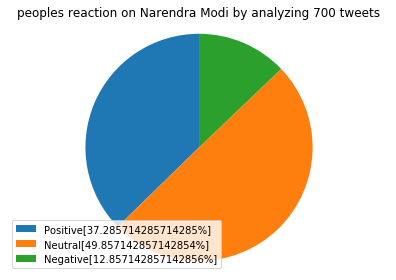

In [7]:
def percentage(number,whole):
    return(float(number)/float(whole)*100)


    
consumer_key = 'RwaBDcLF27BCa0c3gHJlEKmS6'
consumer_secret = 'MEzgzQdO2JstpIVgHfAWHYbsbwKmWXrYBNHc0kHUiJmVH5ltOL'
access_token = '1007280185018761217-FV0lAB67v18NLGIrCUfimOoR1K88uP'
access_token_secret = 'w66YH3mhKlh1bBrtfPExScyMtW0FdHf1VIDVVYfgQBHTo'

auth=OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api=tweepy.API(auth)
searchTerm=input("enter keyword/hastag to search about: ")
noOfSearchTerms=int(input("enter number of tweets to analyze: "))

#tweets=tweepy.Cursor(api.search,q=searchTerm).items(noOfSearchTerms)
positive=0
negative=0
neutral=0
polarity=0

for tweet in tweepy.Cursor(api.search,q=searchTerm,tweet_mode='extended').items(noOfSearchTerms):
    #print(tweet.full_text) 
    analysis=TextBlob(tweet.full_text)
    
    polarity+=analysis.sentiment.polarity

    if(analysis.sentiment.polarity==0):
        neutral+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
        
positivePercentage=percentage(positive,noOfSearchTerms)
negativePercentage=percentage(negative,noOfSearchTerms)
neutralPercentage=percentage(neutral,noOfSearchTerms)

print("peoples reaction on "+searchTerm+" by analyzing "+ str(noOfSearchTerms)+ " tweets")

if (polarity==0):
    print("Neutral")
elif (polarity<0):
    print("Negative")
elif (polarity>0):
    print("positive")

labels=['Positive['+str(positivePercentage)+'%]','Neutral['+str(neutralPercentage)+'%]','Negative['+str(negativePercentage)+'%]']  
sizes=[positivePercentage,neutralPercentage,negativePercentage]
patches,texts=plt.pie(sizes,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("peoples reaction on "+searchTerm+" by analyzing "+ str(noOfSearchTerms)+ " tweets")
plt.axis('equal')

plt.tight_layout()
plt.show()



 

In [5]:
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'RwaBDcLF27BCa0c3gHJlEKmS6'
        consumer_secret = 'MEzgzQdO2JstpIVgHfAWHYbsbwKmWXrYBNHc0kHUiJmVH5ltOL'
        access_token = '1007280185018761217-FV0lAB67v18NLGIrCUfimOoR1K88uP'
        access_token_secret = 'w66YH3mhKlh1bBrtfPExScyMtW0FdHf1VIDVVYfgQBHTo'
        
         # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
            print( 'auth passed')
        except: 
            print("Error: Authentication Failed") 
 
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split() )
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  
    


In [6]:
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query = 'Narendra Modi', count = 700) 
        
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    #percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % ".format(100*len(tweets) - (ntweets) - (ptweets)/len(tweets))) 
  
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 

if __name__ == "__main__": 
    # calling main function 
        main() 


auth passed
Positive tweets percentage: 27.906976744186046 %
Negative tweets percentage: 11.627906976744185 %


TypeError: unsupported operand type(s) for -: 'int' and 'list'